### Imports

In [47]:
# https://www.youtube.com/watch?v=D9sU1hLT0QY
%tensorflow_version 1.x

In [ ]:
!pip install stable-baselines gym-anytrading gym
import tensorflow

In [34]:
print(tensorflow.__version__)

1.15.2


In [35]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Fetch Data

In [45]:
# df = pd.read_csv('data/gmedata.csv')
df = pd.read_csv('data/gemini_BTCUSD_day.csv')
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1636516800000,2021-11-10 04:00:00,BTCUSD,66491.25,69000.00,62927.97,64600.00,2429.065278
1,1636430400000,2021-11-09 04:00:00,BTCUSD,68525.75,68529.52,66262.48,66491.25,1229.455106
2,1636344000000,2021-11-08 04:00:00,BTCUSD,65235.20,68534.11,65138.00,68525.75,1421.075850
3,1636257600000,2021-11-07 04:00:00,BTCUSD,62199.69,65680.00,61537.32,65235.20,892.823526
4,1636171200000,2021-11-06 04:00:00,BTCUSD,61172.03,62338.16,60120.00,62199.69,758.383379


In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.iloc[::-1,2:]
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2021-11-10 04:00:00,1636516800000,BTCUSD,66491.25,69000.00,62927.97,64600.00,2429.065278
2021-11-09 04:00:00,1636430400000,BTCUSD,68525.75,68529.52,66262.48,66491.25,1229.455106
2021-11-08 04:00:00,1636344000000,BTCUSD,65235.20,68534.11,65138.00,68525.75,1421.075850
2021-11-07 04:00:00,1636257600000,BTCUSD,62199.69,65680.00,61537.32,65235.20,892.823526
2021-11-06 04:00:00,1636171200000,BTCUSD,61172.03,62338.16,60120.00,62199.69,758.383379


In [38]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env.action_space

Discrete(2)

info {'total_reward': -11869.369999999988, 'total_profit': 0.5378329934984054, 'position': 1}


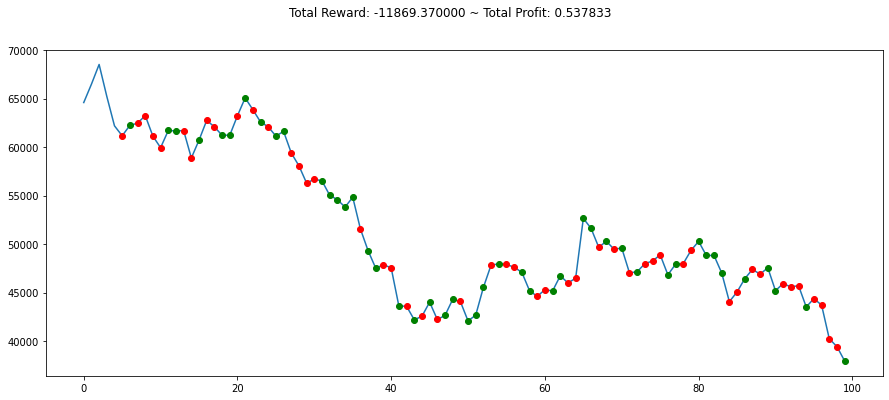

In [21]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [28]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
---------------------------------
| explained_variance | -6.94    |
| fps                | 418      |
| nupdates           | 137600   |
| policy_entropy     | 1.36e-14 |
| total_timesteps    | 688000   |
| value_loss         | 4.59e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.272   |
| fps                | 418      |
| nupdates           | 137700   |
| policy_entropy     | 1.36e-14 |
| total_timesteps    | 688500   |
| value_loss         | 2.7e-06  |
---------------------------------
---------------------------------
| explained_variance | 0.0366   |
| fps                | 418      |
| nupdates           | 137800   |
| policy_entropy     | 1.35e-14 |
| total_timesteps    | 689000   |
| value_loss         | 3.24e-08 |
---------------------------------
---------------------------------
| explained_variance | -44.1    |
| fps                | 418      |
| nupdates           | 137900  

In [43]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,2000), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -62409.89, 'total_profit': 0.0062524000804053525, 'position': 1}


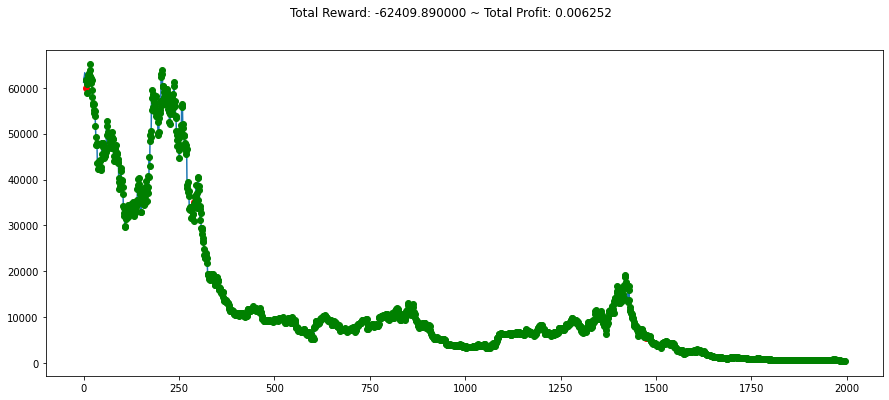

In [44]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()